In [1]:
import seaborn as sns
import pandas as pd
import figures as fg

df_16 = pd.read_csv("../results/16jobs_results.csv")
df_4 = pd.read_csv("../results/4jobs_results.csv")


In [2]:
df_16

,experiment,repetition,runtime,max_mem
0,lustre,0,74.89,1942844
1,lustre,0,75.42,1942156
2,mem_all,0,143.03,1961564
3,mem_final,0,184.31,1960364
4,lustre,1,54.58,1939564
5,mem_final,1,184.28,1958296
6,lustre,1,54.51,1942788
7,mem_all,1,143.67,1959804
8,lustre,2,70.98,1942112
9,mem_final,2,186.34,1958784


# Experiment 1 - 16 parallel jobs & 39 617MB images incremented 10 times (total data generated: ~234GiB)

(0.0, 193.0525)

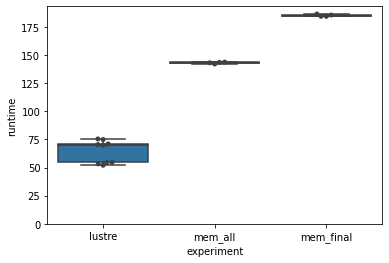

In [3]:
ax = sns.boxplot(x="experiment", y="runtime", data=df_16)
ax = sns.swarmplot(x="experiment", y="runtime", data=df_16, color=".25")
ax.set_ylim(bottom=0)

## Experiment 2 - 4 parallel jobs & 39 617MB images incremented 10 times (total data generated:~234GiB)

(0.0, 202.513)

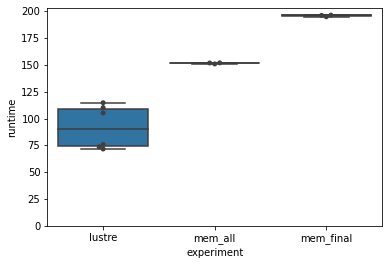

In [4]:
ax = sns.boxplot(x="experiment", y="runtime", data=df_4)
ax = sns.swarmplot(x="experiment", y="runtime", data=df_4, color=".25")
ax.set_ylim(bottom=0)

## Experiment 3 - 16 parallel jobs & Single node multidisk (all 6) & 39 617MB images incremented 10 times

In [5]:
multidisk = pd.read_csv("../results/multidisk_res.csv")
multidisk['runtime'] = multidisk['runtime'].apply(lambda x: float(x))
multidisk = multidisk[['experiment', 'repetition', 'runtime', 'disk_files', 'total_flush']]

In [6]:
multidisk

,experiment,repetition,runtime,disk_files,total_flush
0,lustre,0,102.23,0,0
1,mem_final,0,76.84,0,352
2,mem_all,0,142.64,0,391
3,lustre,1,114.60,0,0
4,mem_final,1,79.25,0,355
5,mem_all,1,129.82,13,391
6,mem_all,2,174.48,0,391
7,lustre,2,114.53,0,0
8,mem_final,2,77.96,0,352


(0.0, 179.362)

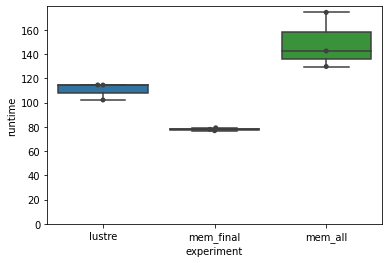

In [7]:
ax = sns.boxplot(x="experiment", y="runtime", data=multidisk)
ax = sns.swarmplot(x="experiment", y="runtime", data=multidisk, color=".25")
ax.set_ylim(bottom=0)

## Experiment 3 Gantt Charts

## Gantt Chart - Sea flush all files

In [8]:
fa_df = fg.load_df("../results/mem_all-2/benchmarks.out")
fg.bokeh_gantt(fa_df)

Loading BokehJS ...

## Gantt chart - Sea flush only final output (in-mem computing)

In [9]:
im_df = fg.load_df("../results/mem_final-2/benchmarks.out")
fg.bokeh_gantt(im_df)

Loading BokehJS ...

## Gantt chart - Write everything to Lustre

In [10]:
l_df = fg.load_df("../results/lustre-2/benchmarks.out")
fg.bokeh_gantt(l_df)

Loading BokehJS ...

In [11]:
im_files = ["../results/mem_final-0/benchmarks.out",
            "../results/mem_final-1/benchmarks.out",
            "../results/mem_final-2/benchmarks.out"]
fa_files = ["../results/mem_all-0/benchmarks.out",
            "../results/mem_all-1/benchmarks.out",
            "../results/mem_all-2/benchmarks.out"]
lustre_files = ["../results/lustre-0/benchmarks.out",
                "../results/lustre-1/benchmarks.out",
                "../results/lustre-2/benchmarks.out"]

load_files = lambda x: [fg.load_df(f) for f in x]

im_dfs = load_files(im_files)
im_dfs = fg.add_rep_idx(im_dfs)

fa_dfs = load_files(fa_files)
fa_dfs = fg.add_rep_idx(fa_dfs)

lustre_dfs = load_files(lustre_files)
lustre_dfs = fg.add_rep_idx(lustre_dfs)
    
im_df = pd.concat(im_dfs, axis=0)
fa_df = pd.concat(fa_dfs, axis=0)
l_df = pd.concat(lustre_dfs, axis=0)
#print(im_df.head())
df = fg.group_actions(im_df, fa_df, l_df)



df.head()

,type,read,increment,write,read_lower,read_upper,inc_lower,inc_upper,write_lower,write_upper
0,Sea - In memory,780.808284,81.723358,136.670455,779.837397,781.779172,861.560755,863.502530,998.231210,1000.172985
1,Sea - Flush all,1153.856880,90.492060,172.841879,1133.539206,1174.174553,1224.031266,1264.666613,1396.873145,1437.508492
2,Lustre,1081.464240,82.658115,345.413351,1014.124736,1148.803744,1096.782851,1231.461859,1442.196203,1576.875211


## Stacked Bar (read/increment/write) - All

In [12]:
fg.bokeh_stacked(df)

Loading BokehJS ...